In [1]:
!git clone https://github.com/jn-aman/Sign-Language-Digit-Detection

Cloning into 'Sign-Language-Digit-Detection'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 15 (delta 2), reused 15 (delta 2), pack-reused 0
Unpacking objects: 100% (15/15), done.


In [2]:
!dir Sign-Language-Digit-Detection/Sign-language-digits-dataset

README.md  X.npy  Y.npy


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import pickle
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pandas as pd
import random
import os
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
np.random.seed(0)

In [6]:
print(os.listdir("Sign-Language-Digit-Detection/Sign-language-digits-dataset"))

['README.md', 'X.npy', 'Y.npy']


In [0]:
x = np.load('Sign-Language-Digit-Detection/Sign-language-digits-dataset/X.npy')
y = np.load('Sign-Language-Digit-Detection/Sign-language-digits-dataset/Y.npy')

In [0]:
x_9 = x[:204]; x_0 = x[204:409]; x_7 = x[409:615]; x_6 = x[615:822]; x_1 = x[822:1028]
x_8 = x[1028:1236]; x_4 = x[1236:1443]; x_3 = x[1443:1649]; x_2 = x[1649:1855]; x_5 = x[1855:]

In [0]:
x_0=np.append(x_0,x_1,axis=0)
x_0=np.append(x_0,x_2,axis=0)
x_0=np.append(x_0,x_3,axis=0)
x_0=np.append(x_0,x_4,axis=0)
x_0=np.append(x_0,x_5,axis=0)
x_0=np.append(x_0,x_6,axis=0)
x_0=np.append(x_0,x_7,axis=0)
x_0=np.append(x_0,x_8,axis=0)
x_0=np.append(x_0,x_9,axis=0)

In [107]:
print(x.shape)
print(x_0.shape)
print(y.shape)


(2062, 64, 64)
(2062, 64, 64)
(2062, 10)


In [0]:
x=x_0


In [109]:
print(x.shape)
print(y.shape)


(2062, 64, 64)
(2062, 10)


In [110]:
y[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

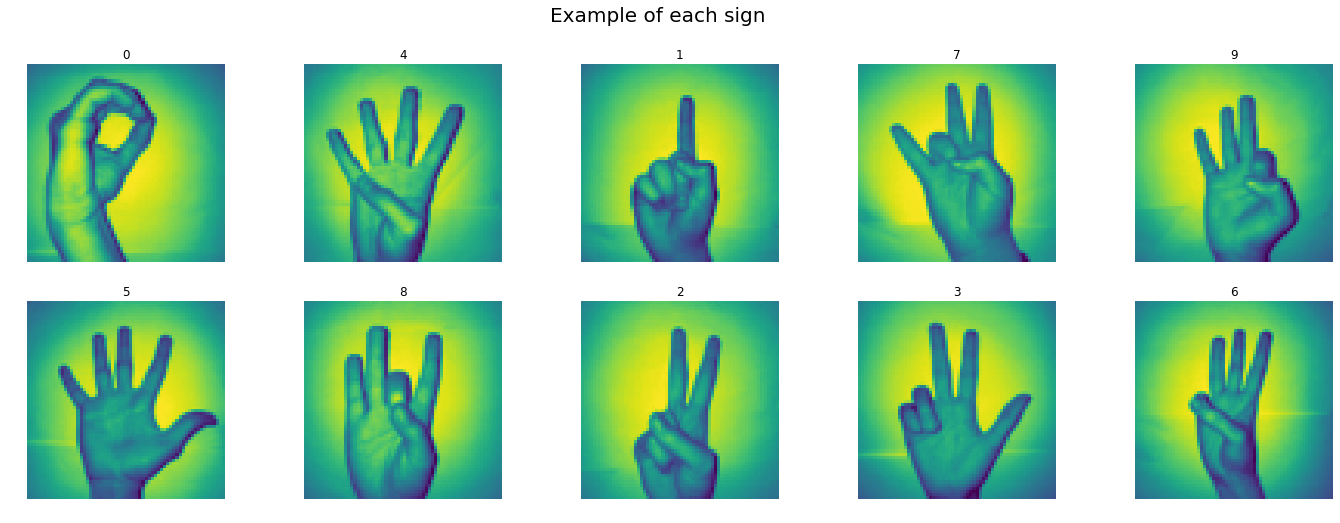

In [111]:

plt.figure(figsize=(24,8))

plt.subplot(2,5,1)
plt.title(y[0].argmax())
plt.imshow(x[0])
plt.axis("off")

plt.subplot(2,5,2)
plt.title(y[1000].argmax())
plt.imshow(x[1000])
plt.axis("off")

plt.subplot(2,5,3)
plt.title(y[222].argmax())
plt.imshow(x[222])
plt.axis("off")

plt.subplot(2,5,4)
plt.title(y[1500].argmax())
plt.imshow(x[1500])
plt.axis("off")

plt.subplot(2,5,5)
plt.title(y[2000].argmax())
plt.imshow(x[2000])
plt.axis("off")

plt.subplot(2,5,6)
plt.title(y[1200].argmax())
plt.imshow(x[1200])
plt.axis("off")

plt.subplot(2,5,7)
plt.title(y[1700].argmax())
plt.imshow(x[1700])
plt.axis("off")

plt.subplot(2,5,8)
plt.title(y[500].argmax())
plt.imshow(x[500])
plt.axis("off")

plt.subplot(2,5,9)
plt.title(y[700].argmax())
plt.imshow(x[700])
plt.axis("off")

plt.subplot(2,5,10)
plt.title(y[1400].argmax())
plt.imshow(x[1400])
plt.axis("off")

plt.suptitle("Example of each sign", fontsize=20)
plt.show()

In [0]:
print(type(x))

<class 'numpy.ndarray'>


In [112]:
print(x.shape)
print(y.shape)


(2062, 64, 64)
(2062, 10)


In [0]:
x = np.expand_dims(x, axis=3)


In [114]:
print(x.shape)
print(y.shape)


(2062, 64, 64, 1)
(2062, 10)


In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

In [0]:
assert(x_train.shape[0] == y_train.shape[0]), "Number of images is not equal to no of labels"
assert(x_val.shape[0] == y_val.shape[0]), "Number of images is not equal to no of labels"
assert(x_test.shape[0] == y_test.shape[0]), "Number of images is not equal to no of labels"
assert(x_train.shape[1:] == (64,64,1)), "Shape of training data is not 64*64*1"
assert(x_val.shape[1:] == (64,64,1)), "Shape of valitation data is not 64*64*1"
assert(x_test.shape[1:] == (64,64,1)), "Shape of test data is not 64*64*1"

In [0]:
classname=["1","2","3","4","5",'6','7','8','9','10']
number = [1, 2, 3, 4, 5, 6, 7,8,9,10] 


In [0]:
data = pd.DataFrame(list(zip(number, classname)),  columns =['ClassId', 'SignName']) 

In [0]:
data

,ClassId,SignName
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5
5,6,6
6,7,7
7,8,8
8,9,9
9,10,10


In [117]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [0]:
# y_notone=(np.argmax(y, axis=1)+1).reshape(-1, 1).ravel()
# y_train_not=(np.argmax(y_train, axis=1)+1).reshape(-1, 1).ravel()
# y_test_not=(np.argmax(y_test, axis=1)+1).reshape(-1, 1).ravel()
# y_val_not=(np.argmax(y_val, axis=1)+1).reshape(-1, 1).ravel()


In [0]:
import collections, numpy
a = (np.argmax(y_train, axis=1)).reshape(-1, 1)
a=a.ravel()
EachClassCount=collections.Counter(a)



In [121]:
EachClassCount

Counter({0: 124,
         1: 127,
         2: 140,
         3: 135,
         4: 133,
         5: 130,
         6: 136,
         7: 125,
         8: 128,
         9: 141})

In [0]:
num_of_samples = []
num_classes = 10
for i in range(0,10):
  num_of_samples.append(EachClassCount[i])

[124, 127, 140, 135, 133, 130, 136, 125, 128, 141]


[]

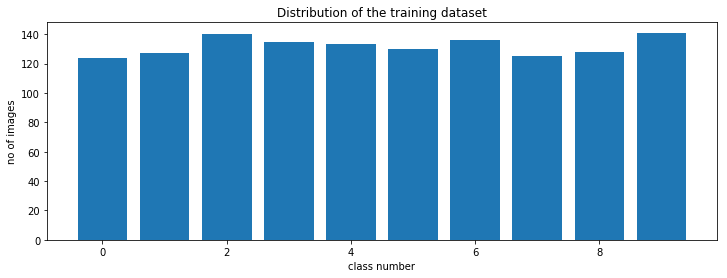

In [124]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("class number")
plt.ylabel("no of images")
plt.plot()

In [0]:
import cv2 


In [126]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(1319, 64, 64, 1)
(1319, 10)
(413, 64, 64, 1)
(413, 10)


In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen  = ImageDataGenerator(width_shift_range = 0.1,
                             height_shift_range = 0.1,
                             zoom_range = 0.2,
                             shear_range = 0.1,
                             rotation_range = 10)
datagen.fit(x_train)

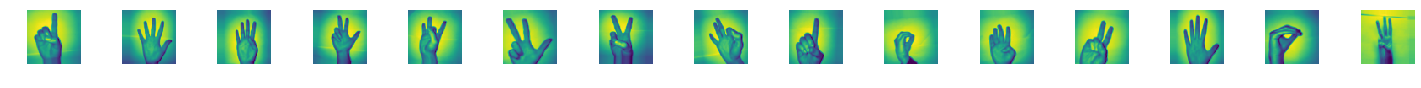

In [128]:
batches = datagen.flow(x_train, y_train, batch_size = 20)
x_batch, y_batch = next(batches)
fig, axs = plt.subplots(1, 15, figsize = (20,5))
fig.tight_layout()
for i in range(15):
  axs[i].imshow(x_batch[i].reshape(64,64))
  axs[i].axis("off")

In [129]:
x_train.shape

(1319, 64, 64, 1)

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [0]:
def model():
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (64,64,1)))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

    

    # fully connected
    model.add(Flatten())

    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(10, activation = 'softmax'))
    optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)


    model.compile(optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model


In [132]:
model = model()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)  

In [133]:
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = 50), steps_per_epoch = 200, epochs = 10, validation_data = (x_val,y_val), shuffle = 1)





Instructions for updating:
Use tf.cast instead.
Epoch 1/10
200/200 [==============================] - 10s 50ms/step - loss: 2.2835 - acc: 0.1211 - val_loss: 1.8549 - val_acc: 0.4697
Epoch 2/10
200/200 [==============================] - 5s 25ms/step - loss: 1.0299 - acc: 0.6577 - val_loss: 0.1910 - val_acc: 0.9667
Epoch 3/10
200/200 [==============================] - 5s 25ms/step - loss: 0.4625 - acc: 0.8644 - val_loss: 0.1243 - val_acc: 0.9727
Epoch 4/10
200/200 [==============================] - 5s 25ms/step - loss: 0.3267 - acc: 0.9059 - val_loss: 0.0838 - val_acc: 0.9788
Epoch 5/10
200/200 [==============================] - 5s 25ms/step - loss: 0.2670 - acc: 0.9231 - val_loss: 0.0803 - val_acc: 0.9879
Epoch 6/10
200/200 [==============================] - 5s 25ms/step - loss: 0.2209 - acc: 0.9374 - val_loss: 0.0759 - val_acc: 0.9909
Epoch 7/10
200/200 [==============================] - 5s 25ms/step - loss: 0.1966 - acc: 0.9446 - val_loss: 0.0728 - val_acc: 0.9879
Epoch 8/10
200/200 [

In [0]:
model.save('trained_model_4.h5')

In [0]:
from google.colab import files
files.download('trained_model_4.h5')


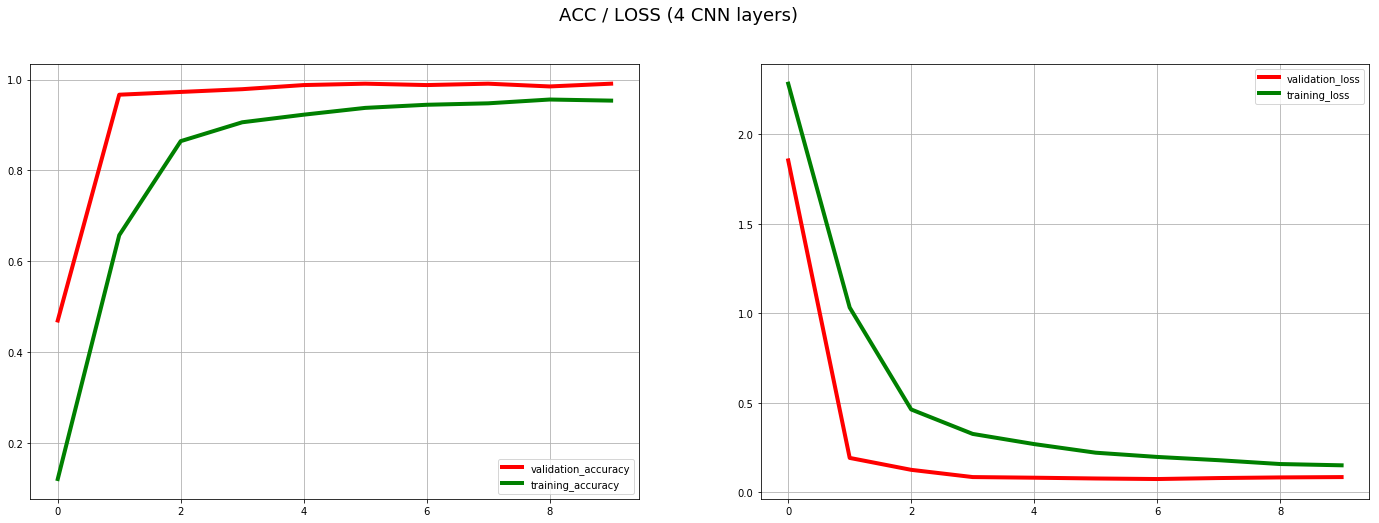

In [134]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.plot(history.history["val_acc"],label="validation_accuracy",c="red",linewidth=4)
plt.plot(history.history["acc"],label="training_accuracy",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history["val_loss"],label="validation_loss",c="red",linewidth=4)
plt.plot(history.history["loss"],label="training_loss",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.suptitle("ACC / LOSS (4 CNN layers)",fontsize=18)

plt.show()


In [137]:
print('Train accuracy of the model: ',history.history['acc'][-1])
print('Train loss of the model: ',history.history['loss'][-1])
print('Validation accuracy of the model: ',history.history['val_acc'][-1])
print('Validation loss of the model: ',history.history['val_loss'][-1])


Train accuracy of the model:  0.9536505321665706
Train loss of the model:  0.14959815973761684
Validation accuracy of the model:  0.9909090941602533
Validation loss of the model:  0.08376617502477585


In [138]:
score4 = model.evaluate(x_test, y_test, verbose = 0)

print("Test loss:", score4[0])
print("Test Accuracy:", score4[1])


Test loss: 0.04501911680965028
Test Accuracy: 0.9927360774818402


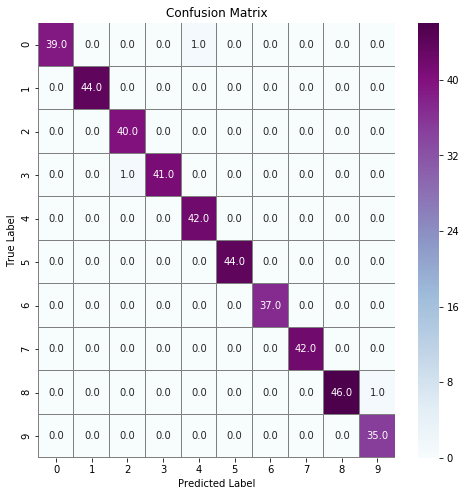

In [139]:
from sklearn.metrics import confusion_matrix

# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [0]:
############################4 layer end################################


In [0]:
############################2 layer begins################################



[0.1072810804403723, 0.9782082340330535]

In [0]:
def model2():
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (64,64,1)))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

    
# model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

#     model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

    

    # fully connected
    model.add(Flatten())

    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(10, activation = 'softmax'))
    optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)


    model.compile(optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model


In [141]:
model2 = model2()
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 64, 64, 32)        832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 8, 8, 32)          0         
__________

In [0]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [143]:
history2 = model2.fit_generator(datagen.flow(x_train, y_train, batch_size = 50), steps_per_epoch = 200, epochs = 10, validation_data = (x_val,y_val), shuffle = 1)


Epoch 1/10
200/200 [==============================] - 5s 25ms/step - loss: 2.0641 - acc: 0.2291 - val_loss: 1.2414 - val_acc: 0.6364
Epoch 2/10
200/200 [==============================] - 5s 23ms/step - loss: 1.0915 - acc: 0.6258 - val_loss: 0.5569 - val_acc: 0.8939
Epoch 3/10
200/200 [==============================] - 5s 24ms/step - loss: 0.7262 - acc: 0.7593 - val_loss: 0.3925 - val_acc: 0.9455
Epoch 4/10
200/200 [==============================] - 5s 24ms/step - loss: 0.5673 - acc: 0.8152 - val_loss: 0.2920 - val_acc: 0.9576
Epoch 5/10
200/200 [==============================] - 5s 24ms/step - loss: 0.4602 - acc: 0.8551 - val_loss: 0.2127 - val_acc: 0.9818
Epoch 6/10
200/200 [==============================] - 5s 24ms/step - loss: 0.4085 - acc: 0.8696 - val_loss: 0.2078 - val_acc: 0.9697
Epoch 7/10
200/200 [==============================] - 5s 24ms/step - loss: 0.3728 - acc: 0.8841 - val_loss: 0.1753 - val_acc: 0.9818
Epoch 8/10
200/200 [==============================] - 5s 24ms/step - 

In [0]:
model2.save('trained_model_2.h5')

In [0]:
from google.colab import files
files.download('trained_model_2.h5')

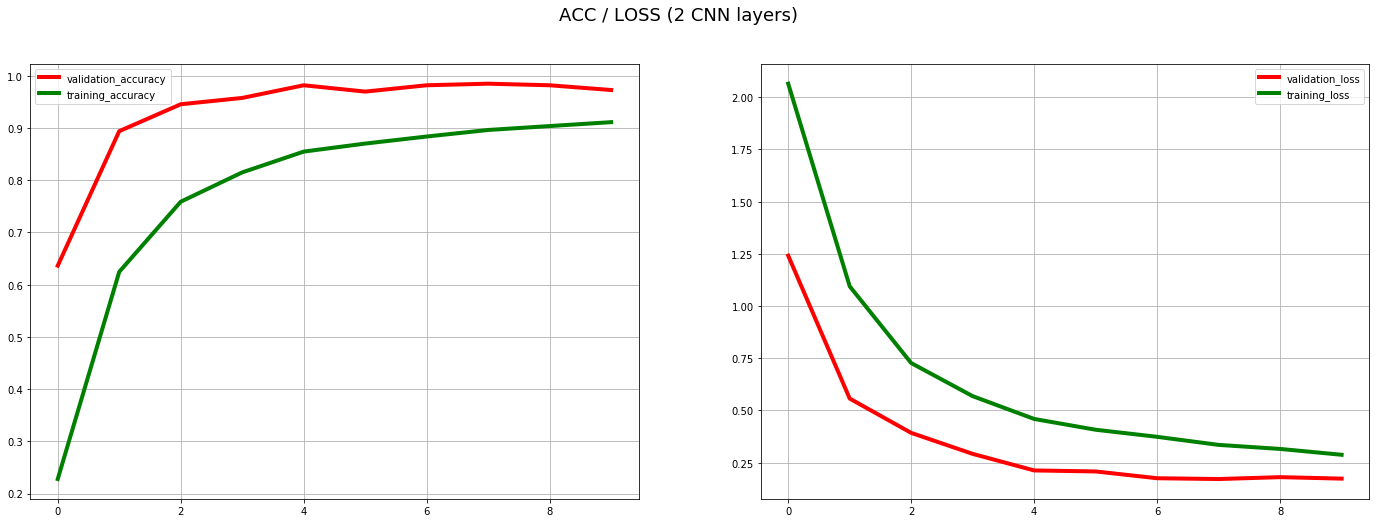

In [144]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.plot(history2.history["val_acc"],label="validation_accuracy",c="red",linewidth=4)
plt.plot(history2.history["acc"],label="training_accuracy",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history2.history["val_loss"],label="validation_loss",c="red",linewidth=4)
plt.plot(history2.history["loss"],label="training_loss",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.suptitle("ACC / LOSS (2 CNN layers)",fontsize=18)

plt.show()


In [147]:
print('Train accuracy of the model: ',history2.history['acc'][-1])
print('Train loss of the model: ',history2.history['loss'][-1])
print('Validation accuracy of the model: ',history2.history['val_acc'][-1])
print('Validation loss of the model: ',history2.history['val_loss'][-1])


Train accuracy of the model:  0.9111977007799309
Train loss of the model:  0.28766688867911416
Validation accuracy of the model:  0.9727272752559546
Validation loss of the model:  0.17347247717958508


In [148]:
score2 = model2.evaluate(x_test, y_test, verbose = 0)

print("Test loss:", score2[0])
print("Test Accuracy:", score2[1])


Test loss: 0.15468710632070212
Test Accuracy: 0.9685230024213075


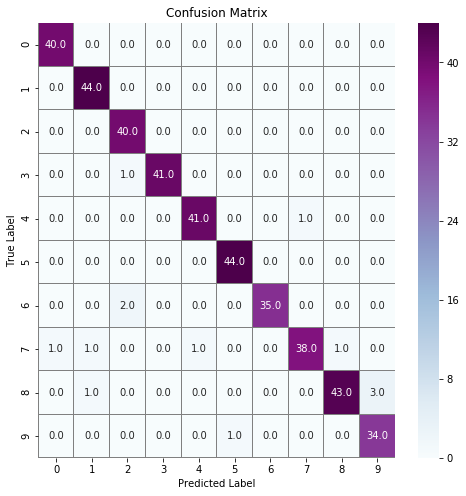

In [149]:
from sklearn.metrics import confusion_matrix

# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model2.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [0]:
############################2 layer end################################


In [0]:
############################1 layer begins################################


In [0]:
def model1():
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (64,64,1)))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

    
# model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

#     model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

#     model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

    

    # fully connected
    model.add(Flatten())

    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(10, activation = 'softmax'))
    optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)


    model.compile(optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model


In [151]:
model1 = model1()
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 64, 32)        832       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 8, 8, 32)          0         
__________

In [152]:
history1 = model1.fit_generator(datagen.flow(x_train, y_train, batch_size = 50), steps_per_epoch = 200, epochs = 10, validation_data = (x_val,y_val), shuffle = 1)


Epoch 1/10
200/200 [==============================] - 5s 26ms/step - loss: 2.0944 - acc: 0.2301 - val_loss: 1.5395 - val_acc: 0.6364
Epoch 2/10
200/200 [==============================] - 5s 23ms/step - loss: 1.3799 - acc: 0.5104 - val_loss: 1.0686 - val_acc: 0.7152
Epoch 3/10
200/200 [==============================] - 5s 24ms/step - loss: 1.1400 - acc: 0.5893 - val_loss: 0.8636 - val_acc: 0.7273
Epoch 4/10
200/200 [==============================] - 5s 24ms/step - loss: 1.0315 - acc: 0.6328 - val_loss: 0.7394 - val_acc: 0.8485
Epoch 5/10
200/200 [==============================] - 5s 23ms/step - loss: 0.9529 - acc: 0.6622 - val_loss: 0.6765 - val_acc: 0.8545
Epoch 6/10
200/200 [==============================] - 5s 24ms/step - loss: 0.8830 - acc: 0.6836 - val_loss: 0.6247 - val_acc: 0.8848
Epoch 7/10
200/200 [==============================] - 5s 23ms/step - loss: 0.8311 - acc: 0.7048 - val_loss: 0.6110 - val_acc: 0.8303
Epoch 8/10
200/200 [==============================] - 5s 23ms/step - 

In [0]:
model1.save('trained_model_1.h5')
from google.colab import files
files.download('trained_model_1.h5')

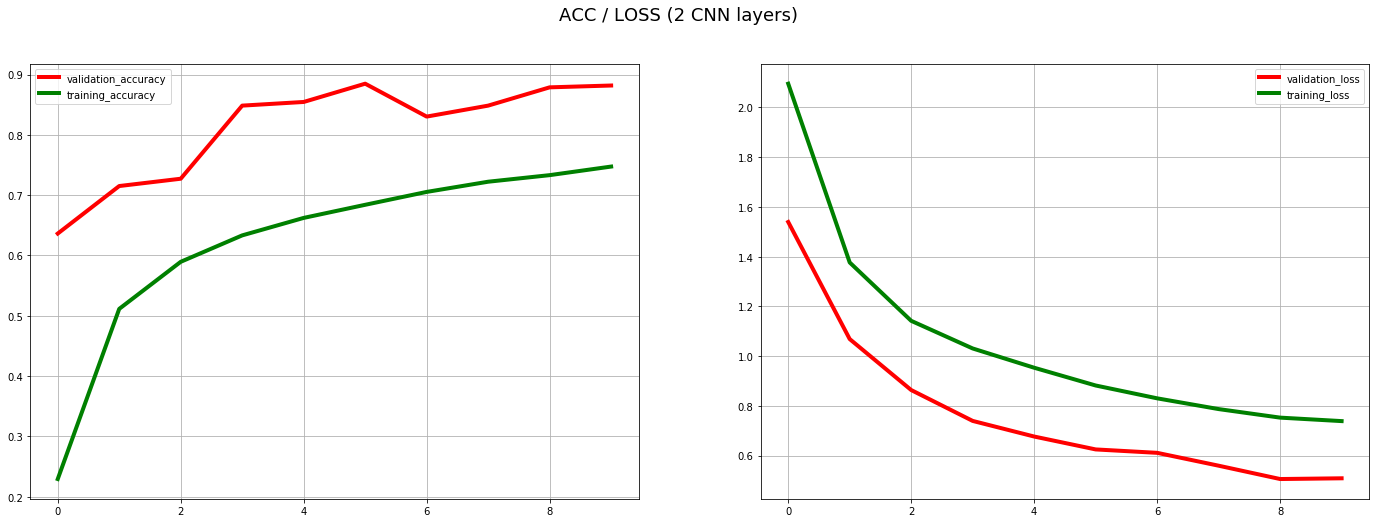

In [154]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.plot(history1.history["val_acc"],label="validation_accuracy",c="red",linewidth=4)
plt.plot(history1.history["acc"],label="training_accuracy",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history1.history["val_loss"],label="validation_loss",c="red",linewidth=4)
plt.plot(history1.history["loss"],label="training_loss",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.suptitle("ACC / LOSS (2 CNN layers)",fontsize=18)

plt.show()


In [155]:
print('Train accuracy of the model: ',history1.history['acc'][-1])
print('Train loss of the model: ',history1.history['loss'][-1])
print('Validation accuracy of the model: ',history1.history['val_acc'][-1])
print('Validation loss of the model: ',history1.history['val_loss'][-1])


Train accuracy of the model:  0.7474364224054267
Train loss of the model:  0.738608167033835
Validation accuracy of the model:  0.8818181753158569
Validation loss of the model:  0.5085636187683452


In [156]:
score1 = model1.evaluate(x_test, y_test, verbose = 0)

print("Test loss:", score1[0])
print("Test Accuracy:", score1[1])

Test loss: 0.5188812212274381
Test Accuracy: 0.8837772384105526


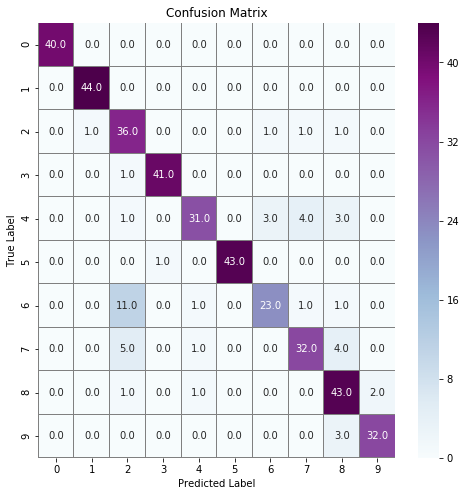

In [157]:
from sklearn.metrics import confusion_matrix

# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model1.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [0]:
############################1 layer ends################################


In [0]:
#compare

In [0]:
label=["4 Layer CNN","2 Layer CNN","1 Layer CNN"]

In [0]:
Train_accuracy_of_the_model=[]
Train_loss_of_the_model=[]
Validation_accuracy_of_the_model=[]
Validation_loss_of_the_model=[]
Test_accuracy_of_the_model=[]
Test_loss_of_the_model=[]


In [0]:
Train_accuracy_of_the_model.append(history.history['acc'][-1])
Train_loss_of_the_model.append(history.history['loss'][-1])
Validation_accuracy_of_the_model.append(history.history['val_acc'][-1])
Validation_loss_of_the_model.append(history.history['val_loss'][-1])
Test_accuracy_of_the_model.append(score4[1])
Test_loss_of_the_model.append(score4[0])


In [0]:
Train_accuracy_of_the_model.append(history2.history['acc'][-1])
Train_loss_of_the_model.append(history2.history['loss'][-1])
Validation_accuracy_of_the_model.append(history2.history['val_acc'][-1])
Validation_loss_of_the_model.append(history2.history['val_loss'][-1])
Test_accuracy_of_the_model.append(score2[1])
Test_loss_of_the_model.append(score2[0])

In [0]:
Train_accuracy_of_the_model.append(history1.history['acc'][-1])
Train_loss_of_the_model.append(history1.history['loss'][-1])
Validation_accuracy_of_the_model.append(history1.history['val_acc'][-1])
Validation_loss_of_the_model.append(history1.history['val_loss'][-1])
Test_accuracy_of_the_model.append(score1[1])
Test_loss_of_the_model.append(score1[0])

In [163]:
Test_accuracy_of_the_model

[0.9927360774818402, 0.9685230024213075, 0.8837772384105526]

In [0]:
def autolabel1(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%f' % float(height),rotation=45,
                ha='center', va='bottom',color='b')
def autolabel2(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%f' % float(height),rotation=45,
                ha='center', va='bottom',color='r')


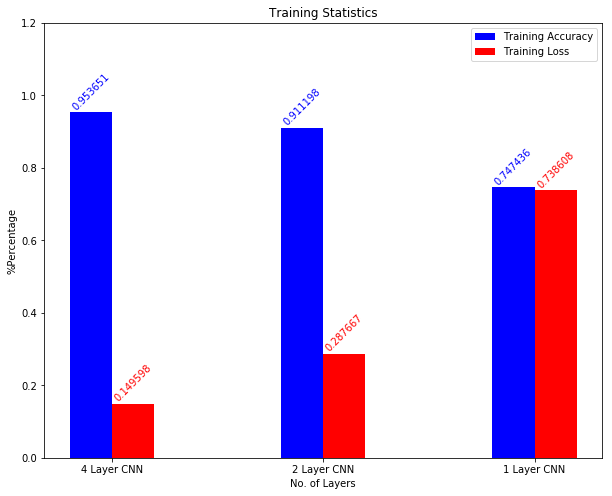

<Figure size 14400x7200 with 0 Axes>

In [165]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

# data to plot
n_groups = 3
means_frank = Train_accuracy_of_the_model
means_guido = Train_loss_of_the_model

# create plot
fig, ax = plt.subplots(figsize=(10,8))

index = np.arange(n_groups)
bar_width = 0.20
opacity = 1


plt.ylim([0,1.2])


rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='b',
label='Training Accuracy',edgecolor='')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='r',
label='Training Loss',edgecolor='')

plt.xlabel('No. of Layers')
plt.ylabel('%Percentage')
plt.title('Training Statistics')
plt.xticks(index + bar_width/2, ('4 Layer CNN', '2 Layer CNN', '1 Layer CNN'))
plt.legend()
plt.figure(figsize=(200,100)) 

autolabel1(rects1)
autolabel2(rects2)

plt.show()

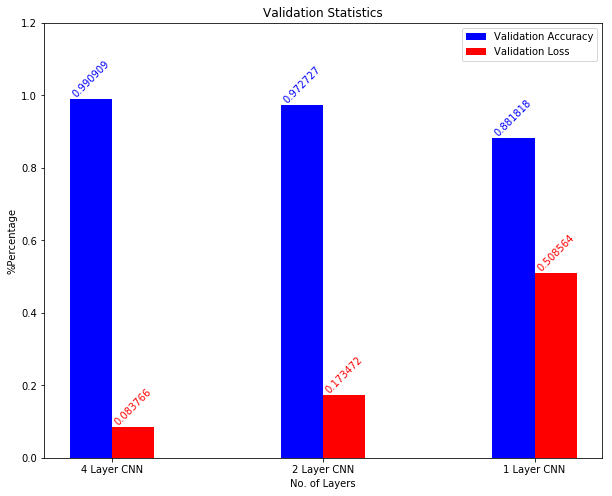

<Figure size 14400x7200 with 0 Axes>

In [166]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

# data to plot
n_groups = 3
means_frank = Validation_accuracy_of_the_model
means_guido = Validation_loss_of_the_model

# create plot
fig, ax = plt.subplots(figsize=(10,8))

index = np.arange(n_groups)
bar_width = 0.20
opacity = 1


plt.ylim([0,1.2])


rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='b',
label='Validation Accuracy',edgecolor='')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='r',
label='Validation Loss',edgecolor='')

plt.xlabel('No. of Layers')
plt.ylabel('%Percentage')
plt.title('Validation Statistics')
plt.xticks(index + bar_width/2, ('4 Layer CNN', '2 Layer CNN', '1 Layer CNN'))
plt.legend()
plt.figure(figsize=(200,100)) 

autolabel1(rects1)
autolabel2(rects2)

plt.show()

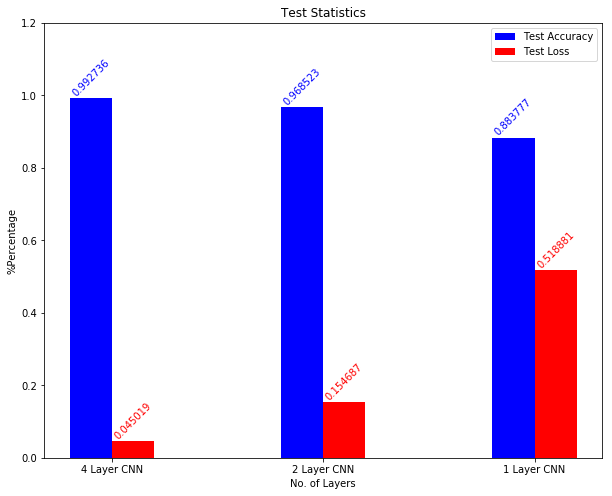

<Figure size 14400x7200 with 0 Axes>

In [167]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

# data to plot
n_groups = 3
means_frank = Test_accuracy_of_the_model
means_guido = Test_loss_of_the_model

# create plot
fig, ax = plt.subplots(figsize=(10,8))

index = np.arange(n_groups)
bar_width = 0.20
opacity = 1


plt.ylim([0,1.2])


rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='b',
label='Test Accuracy',edgecolor='')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='r',
label='Test Loss',edgecolor='')

plt.xlabel('No. of Layers')
plt.ylabel('%Percentage')
plt.title('Test Statistics')
plt.xticks(index + bar_width/2, ('4 Layer CNN', '2 Layer CNN', '1 Layer CNN'))
plt.legend()
plt.figure(figsize=(200,100)) 

autolabel1(rects1)
autolabel2(rects2)

plt.show()

In [0]:
#After fine tuning model,we can see that we have avoided the problem of overfitting as validation loss is less than training loss, and our validation accuracy is more than training accuracy

TESTING THE MODEL WITH REAL IMAGES

In [0]:
from keras.models import load_model
model = load_model('trained_model_4.h5')

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import pickle
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pandas as pd
import random

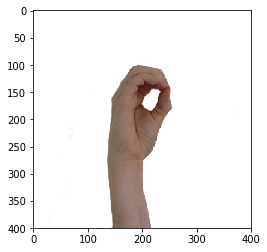

In [170]:
import requests
from PIL import Image


url = 'https://images2.pics4learning.com/catalog/0/0.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [0]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

def equalize(img):
    img = cv2.equalizeHist(img)
    return img


In [0]:

def preprocessing(img):

    img = grayscale(img)
    
#     img = equalize(img)
    img = img/255 #normalizing the input
    return img



(64, 64)


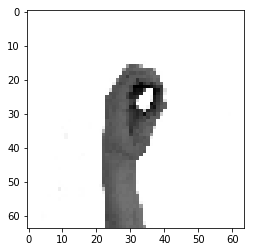

In [173]:
import cv2
img = np.asarray(img)
img = cv2.resize(img, (64, 64))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
 

In [174]:
img = img.reshape(1, 64, 64, 1)

model.predict_classes(img)[0]

0